<a href="https://colab.research.google.com/github/Amir-Ali-Peymani/DL-practice/blob/main/FNN(picture_classification_sparse_ctg_cross_entropy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow
from tensorflow import keras

In [12]:
keras.__version__

'3.4.1'

In [2]:
data_set  = keras.datasets.fashion_mnist

In [3]:
(train_x, train_y), (test_x , test_y) = data_set.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
train_y.shape

(60000,)

In [10]:
train_x.shape

(60000, 28, 28)

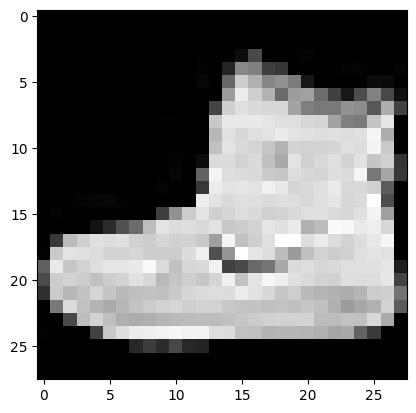

In [6]:
plt.imshow(train_x[0], cmap="gray")

In [7]:
train_x , test_x = train_x/255.0 , test_x/255.0

In [ ]:
train_x[0]

In [20]:
model = keras.models.Sequential()
# input layer takes the input of the neorun system
model.add(keras.layers.Flatten(input_shape=[28,28]))
# first layer with the numbers of noronse and the activation rule
model.add(keras.layers.Dense(100, activation="relu"))
# second layer with the numbers of neorons and the activation rule
model.add(keras.layers.Dense(75, activation="relu"))
# third layer with the last layer with the output of the neuron system
model.add(keras.layers.Dense(10,activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary

<bound method Model.summary of <Sequential name=sequential_2, built=True>>

In [14]:
 model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [21]:
model.compile(loss= "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [22]:
history = model.fit(x=train_x, y = train_y, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6477 - loss: 1.1108 - val_accuracy: 0.8109 - val_loss: 0.5537
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8164 - loss: 0.5346 - val_accuracy: 0.8147 - val_loss: 0.5193
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8348 - loss: 0.4742 - val_accuracy: 0.8411 - val_loss: 0.4623
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8450 - loss: 0.4415 - val_accuracy: 0.8484 - val_loss: 0.4316
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8542 - loss: 0.4186 - val_accuracy: 0.8379 - val_loss: 0.4493
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8595 - loss: 0.4012 - val_accuracy: 0.8522 - val_loss: 0.4199
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8669 - loss: 0.3771 - val_accuracy: 0.8612 - val_loss: 0.4020
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8690 - loss: 0.3764 - 

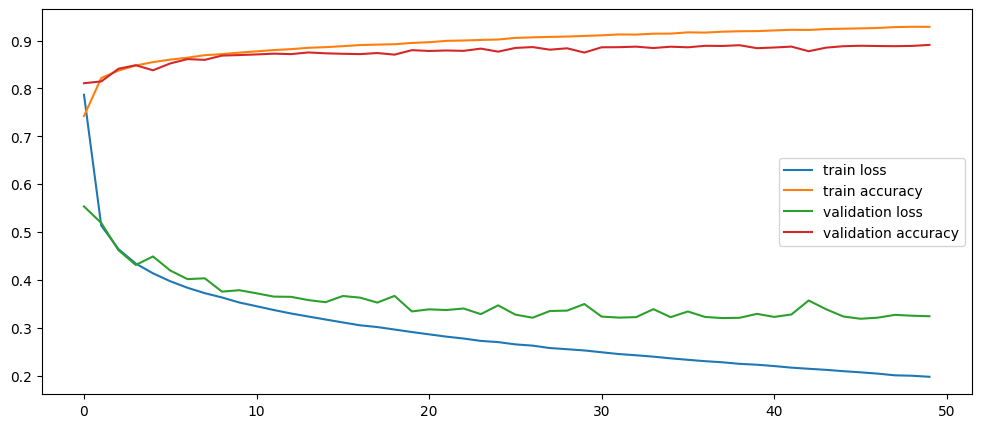

In [26]:
fig , ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label = "train accuracy")
ax.plot(history.history["val_loss"], label= "validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [29]:
model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8866 - loss: 0.3484


[0.3540019989013672, 0.8841000199317932]

In [43]:
x_test = test_x[3:5]

In [44]:
x_test.shape

(2, 28, 28)

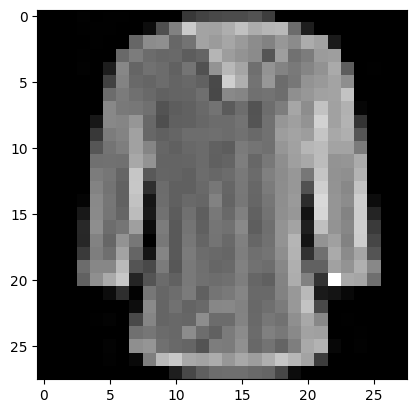

In [50]:
plt.imshow(x_test[1], cmap="gray")

In [52]:
model.predict(x_test[1].reshape(1, 28,28)).round(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0.1, 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. ]], dtype=float32)

In [53]:
import numpy as np

In [54]:
np.argmax(model.predict(x_test[1].reshape(1, 28,28)).round(1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


6